# Sine fit - Nyquist-Shannon with MCU data

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
from scipy.optimize import curve_fit


Intervallo di campionamento =  -0.0009999999999999992  secondi


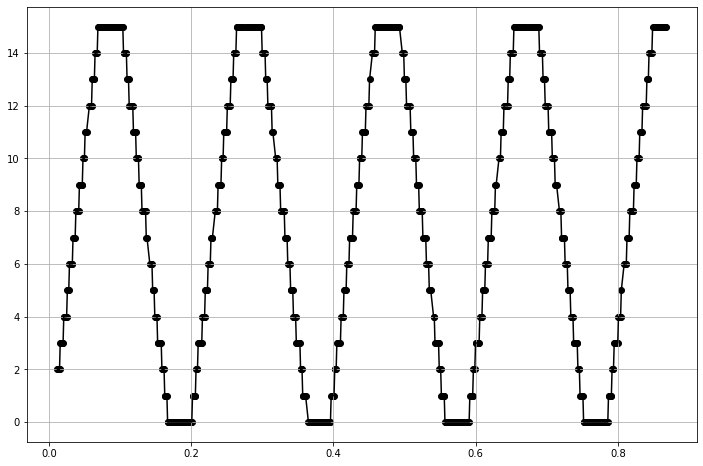

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
name = 28
file = pd.read_csv(f"../data-source/4-11-21/S{name}.TXT")

start = 0
end   = 800

data = file.to_numpy().transpose()
fig, ax = plt.subplots(figsize=(12,8))

xdata = data[0][start:end]
ydata = data[1][start:end]

ax.plot(xdata, ydata, color = "black")
ax.scatter(data[0][start:end], data[1][start:end], color = "black")
ax.grid()
print("Intervallo di campionamento = ", data[0][0] - data[0][1], " secondi")

In [82]:
def func(x, f, p, A, O):

    return A * np.sin(-f * 2 * np.pi * x + p) + O

fit: x=5.000, f=-1.928, A=7.823, O=7.537


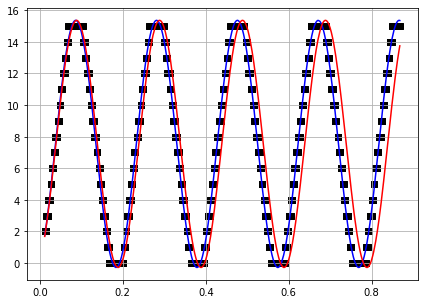

In [83]:
expectedF = 5.

bv = ((5., 2000.), # frequenza
      (0., 7.), # fase
      (0.1, 5), # Ampiezza
      (-3., 0.1)) # Offset

bv = (
    (4., -3., 7., 0.2),
    (2000., 3.0, 30., 10.)
)

p0=[6., -0. , (max(ydata) - min(ydata)) / 2. + 4, (max(ydata) + min(ydata)) / 2.]

popt, pcov = curve_fit(func, xdata, ydata, p0, bounds= bv)
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(xdata, ydata, color = "black", marker = "s")
ax.plot(xdata, func(xdata, *popt), color = "blue")
popt[0] = expectedF
ax.plot(xdata, func(xdata, *popt), color = "red")
ax.grid()

print('fit: x=%5.3f, f=%5.3f, A=%5.3f, O=%5.3f' % tuple(popt))

In [74]:
popt[2] = 0.
popt

array([ 5.12924529, -1.92784873,  0.        ,  7.5368072 ])